In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import math

In [2]:
discussions_df = pd.read_csv('data/Discussions.csv', header=0, encoding='utf-8')
ratings_df = pd.read_csv('data/Ratings.csv', header=0, encoding='utf-8')
display(discussions_df)
display(ratings_df)

DiscussionID                     AlbumName                ArtistName  \
0            1.0                          IGOR        Tyler, the Creator   
1            2.0              The New Abnormal               The Strokes   
2            3.0                        Blonde               Frank Ocean   
3            4.0   So Tonight that I Might See                Mazzy Star   
4            5.0            A New World Record  Electric Light Orchestra   
..           ...                           ...                       ...   
66          67.0                Titanic Rising               Weyes Blood   
67          68.0          Because the Internet          Childish Gambino   
68          69.0              The Four Seasons           Antonio Vivaldi   
69          70.0  House Of Balloons (Original)                The Weeknd   
70           NaN                           NaN                       NaN   

          Date  AvgRating  Stdev  Attendance RotationGenre OtherGenre  \
0   2022-02-19       0.00   0.00         0.0           NaN      False   
1   2022-02-26       0.00   0.00         0.0           NaN      False   
2   2022-03-06       0.00   0.00         0.0           NaN      False   
3   2022-03-27       0.00   0.00         0.0           NaN      False   
4   2022-04-03       0.00   0.00         0.0           NaN      False   
..         ...        ...    ...         ...           ...        ...   
66  2024-02-05       8.20   1.50        55.0           Pop      False   
67  2024-02-12       6.88   1.93        42.0       Hip-Hop      False   
68  2024-02-19       8.08   1.25        38.0     Classical       True   
69  2024-02-26       8.04   1.08        30.0    Mainstream       True   
70         NaN        NaN    NaN         NaN           NaN        NaN   

                                            Subgenres  ReleaseYear  \
0                          Neo-Soul, Psychedelic Soul       2019.0   
1                                          Indie Rock       2020.0   
2                  Alternative R&B, Art Pop, Neo-Soul       2016.0   
3                          Dream Pop, Neo-Psychedelia       1993.0   
4           Symphonic Rock, Pop Rock, Progressive Pop       1976.0   
..                                                ...          ...   
66  Baroque Pop, Art Pop, Progressive Pop, Singer-...       2019.0   
67  Abstract Hip Hop, West Coast Hip Hop, Contempo...       2013.0   
68                            Baroque Music, Concerto       1985.0   
69                         Alternative R&B, Downtempo       2011.0   
70                                                NaN          NaN   

                            FavoriteTrack  Popularity  Tracks  \
0                                     NaN        85.0    12.0   
1                                     NaN        76.0     9.0   
2                                     NaN        86.0    17.0   
3                                     NaN        73.0    10.0   
4                                     NaN        67.0     9.0   
..                                    ...         ...     ...   
66                              Andromeda        68.0    10.0   
67                                   3005        81.0    19.0   
68           Winter: I. Allegro non molto        63.0    12.0   
69  House Of Balloons / Glass Table Girls        83.0     9.0   
70                                    NaN         NaN     NaN   

                 SpotifyID                                              Image  
0   5zi7WsKlIiUXv09tbGLKsE  https://i.scdn.co/image/ab67616d0000b273700588...  
1   2xkZV2Hl1Omi8rk2D7t5lN  https://i.scdn.co/image/ab67616d0000b273bfa99a...  
2   3mH6qwIy9crq0I9YQbOuDf  https://i.scdn.co/image/ab67616d0000b273c5649a...  
3   5K18gTgac0q6Jma5HkV1vA  https://i.scdn.co/image/ab67616d0000b27389a392...  
4   7a35UzxXYuKQGMGImyB0Un  https://i.scdn.co/image/ab67616d0000b273ee5b10...  
..                     ...                                                ...  
66  0Cuqhgy8vm96JEkBY3polk  http

MemberID  DiscussionID  Rating  \
0           88             1       7   
1           59             2       8   
2           88             3       9   
3          294             3      10   
4          201             3       7   
...        ...           ...     ...   
1707       313            69       8   
1708       165            69       7   
1709       131            69       8   
1710       286            69       7   
1711        19            69       7   

                                         FavoriteTrack1  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1707  Vivaldi: The Four Seasons, Violin Concerto in ...   
1708                                                NaN   
1709  Vivaldi: The Four Seasons, Violin Concerto in ...   
1710  Vivaldi: The Four Seasons, Violin Concerto in ...   
1711  Vivaldi: The Four Seasons, Violin Concerto in ...   

                                         FavoriteTrack2  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1707  Vivaldi: The Four Seasons, Violin Concerto in ...   
1708                                                NaN   
1709  Vivaldi: The Four Seasons, Violin Concerto in ...   
1710  Vivaldi: The Four Seasons, Violin Concerto in ...   
1711  Vivaldi: The Four Seasons, Violin Concerto in ...   

                                         FavoriteTrack3  
0                                                   NaN  
1                                                   NaN  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
1707  Vivaldi: The Four Seasons, Violin Concerto in ...  
1708                                                NaN  
1709  Vivaldi: The Four Seasons, Violin Concerto in ...  
1710  Vivaldi: The Four Seasons, Violin Concerto in ...  
1711  Vivaldi: The Four Seasons, Violin Concerto in ...  

[1712 rows x 6 columns]

# Baseline Estimate

The most simple prediction system we can make is by using the baseline estimate: take the average rating of *every* user, and account for slight deviations in users and items.

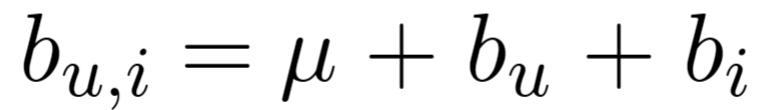

mu = Average rating of *every* item across *every* user\
b_u = Rating deviation of a given user u\
b_i = Rating deviation of a given item i

The idea is that if a user tends to rate more positively than the average user, we account for that in our rating deviation for that user. On a similar note, if an album tends to be more negatively rated than the average album, then we can account for that as well with our rating deviation for said album.

In [3]:
# Standard mu + b_i + b_u
X = ratings_df.drop(columns=['Rating'])
y = ratings_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train['Rating'] = y_train

mu = np.mean(X_train['Rating'])
y_pred = []
for idx, row in X_test.iterrows():
    b_u = np.mean(X_train[X_train['MemberID'] == row['MemberID']]['Rating']) - mu
    b_u = 0 if math.isnan(b_u) else b_u
    b_i = np.mean(X_train[X_train['DiscussionID'] == row['DiscussionID']]['Rating']) - mu
    b_i = 0 if math.isnan(b_i) else b_i
    estimate = max(min(int(np.round(mu - b_u - b_i)), 10), 1)
    y_pred.append(estimate)
y_pred = np.array(y_pred)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print(rmse)

2.1277766866658223


So what does the RMSE of 2.128 stand for? This effectively means that for any given album, our prediction will (on average) be off by about 2.128 units. 

However, that's not really good, considering how wide 2.128 actually is! There is definitely margin for improvement, and collaborative filtering is a step in the right direction.

# User-User Collaborative Filtering

The main principle behind user-user CF is that we can make better assessments of ratings by comparing to similar users. Think about it: although we can account for user deviations (if someone tends to rate more positively/negatively), it can only take us so far. With User-User CF, we can group users based on similarity.

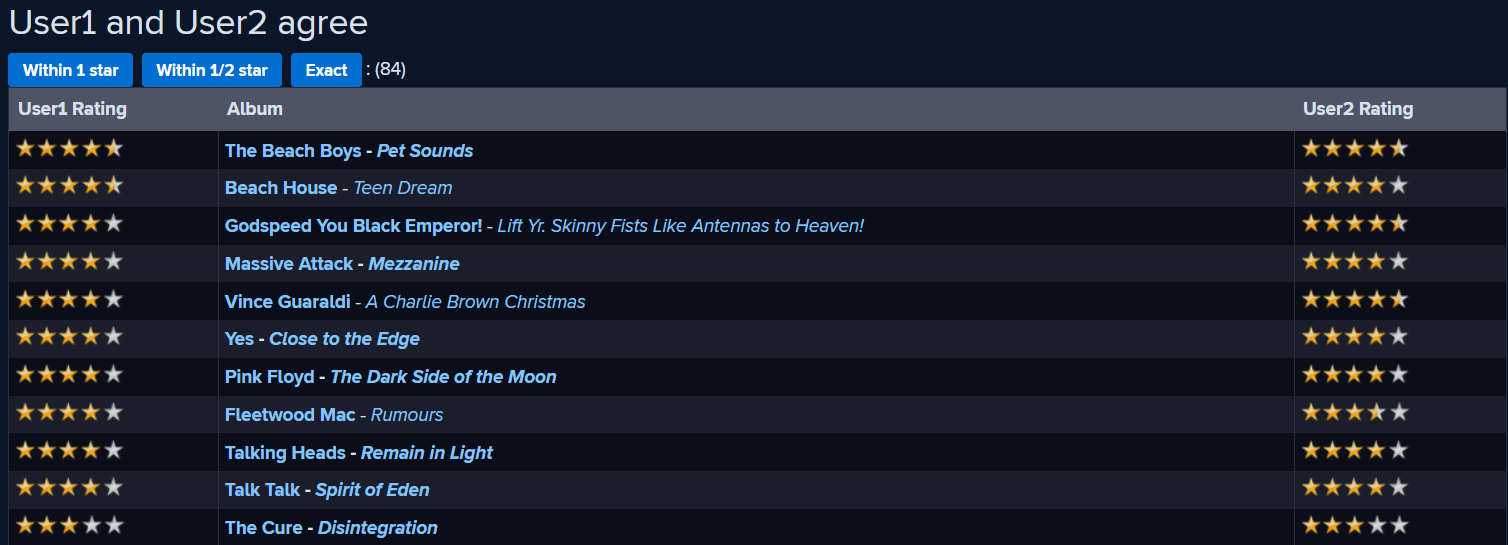

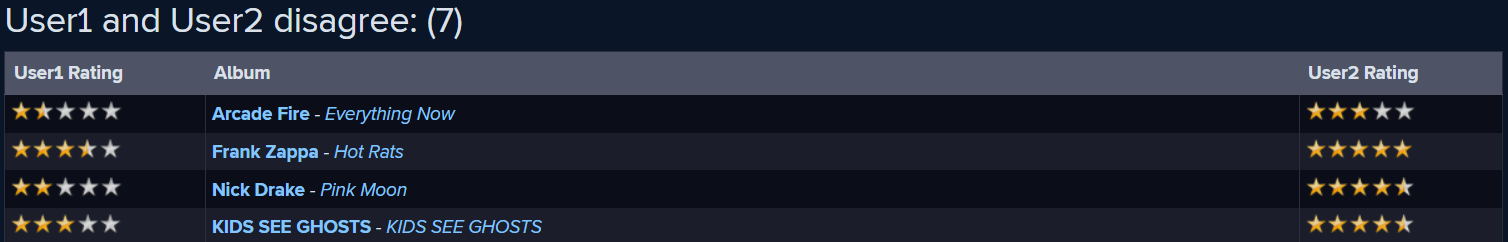

As an example, from the screenshots above, for two users User1 and User2, it can be seen that they hold a lot of similar opinions on albums. Based on this, when User1 rates an album, it is very likely that User2 will also have a similar rating (within 2 points (out of 10)), and vice versa.

In [4]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)

    return dot_product / (norm_vec1 * norm_vec2)

def count_non_zeros(arr):
    return sum(1 for num in arr if num != 0)

In [5]:
X = ratings_df.drop(columns=['Rating'])
y = ratings_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train['Rating'] = y_train

pivot_df = X_train.pivot(index='DiscussionID', columns='MemberID', values='Rating')
pivot_df = pivot_df.fillna(0)
display(pivot_df)

MemberID      1    3    5    6    7    8    9    10   11    12   ...  326  \
DiscussionID                                                     ...        
1             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   
2             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   
3             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   
4             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   
5             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...  0.0   
...           ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...   
65            0.0  0.0  0.0  0.0  0.0  7.0  0.0  0.0  0.0   8.0  ...  0.0   
66            8.0  0.0  0.0  7.0  0.0  9.0  0.0  0.0  0.0   9.0  ...  0.0   
67            0.0  0.0  0.0  0.0  0.0  8.0  0.0  0.0  0.0  10.0  ...  8.0   
68            7.0  0.0  0.0  0.0  0.0  8.0  0.0  0.0  0.0   8.0  ...  0.0   
69            0.0  0.0  0.0  0.0  0.0  9.0  0.0  0.0  0.0  10.0  ...  0.0   

MemberID      329  331  333  335  336  337  338  340   341  
DiscussionID                                                
1             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
2             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
3             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
4             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
5             0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
...           ...  ...  ...  ...  ...  ...  ...  ...   ...  
65            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  
66            7.0  6.0  4.0  4.0  6.0  0.0  0.0  0.0   0.0  
67            0.0  0.0  0.0  4.0  8.0  0.0  0.0  7.0  10.0  
68            0.0  0.0  0.0  0.0  0.0  9.0  8.0  0.0   0.0  
69            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  

[68 rows x 243 columns]

In [6]:
# Retrieve sample entry: MemberID=341's rating of DiscussionID=67
album = 68
print(list(pivot_df[341]))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0]


In [7]:
user = 341
album = 68
user_sims = {}

for member_id in pivot_df.columns:
    if member_id != user:
        print('User:', member_id)
        print('Cosine Sim:', cosine_similarity(pivot_df[user], pivot_df[member_id]))
        user_sims[member_id] = cosine_similarity(pivot_df[user], pivot_df[member_id])

User: 1
Cosine Sim: 0.0
User: 3
Cosine Sim: 0.0
User: 5
Cosine Sim: 0.0
User: 6
Cosine Sim: 0.0
User: 7
Cosine Sim: 0.0
User: 8
Cosine Sim: 0.3140274687915438
User: 9
Cosine Sim: 0.0
User: 10
Cosine Sim: 0.0
User: 11
Cosine Sim: 0.0
User: 12
Cosine Sim: 0.2458851198024517
User: 13
Cosine Sim: 0.0
User: 14
Cosine Sim: 0.0
User: 15
Cosine Sim: 0.0
User: 16
Cosine Sim: 0.0
User: 17
Cosine Sim: 0.0
User: 18
Cosine Sim: 0.0
User: 19
Cosine Sim: 0.0
User: 20
Cosine Sim: 0.0
User: 21
Cosine Sim: 0.0
User: 22
Cosine Sim: 0.0
User: 23
Cosine Sim: 0.0
User: 25
Cosine Sim: 0.0
User: 26
Cosine Sim: 0.0
User: 27
Cosine Sim: 0.0
User: 28
Cosine Sim: 0.0
User: 29
Cosine Sim: 0.0
User: 30
Cosine Sim: 0.0
User: 31
Cosine Sim: 0.17571529931858174
User: 32
Cosine Sim: 0.0
User: 33
Cosine Sim: 0.0
User: 35
Cosine Sim: 0.20862642825481667
User: 37
Cosine Sim: 0.3626203338114211
User: 38
Cosine Sim: 0.2141764684390597
User: 39
Cosine Sim: 0.0
User: 40
Cosine Sim: 0.0
User: 41
Cosine Sim: 0.0
User: 42
Cosine

In [8]:
rated_users = []
for i in pivot_df.columns:
    if pivot_df[i][album] != 0 and i != user:
        rated_users.append(i)
rated_user_sims = []
for u in rated_users:
    rated_user_sims.append(user_sims[u])
    
top3_rated_users = []
top3_sims = []
sorted_pairs = sorted(zip(rated_users, rated_user_sims), key=lambda x: x[1], reverse=True)
for top3_user, sim in sorted_pairs[:3]:
    print(top3_user, sim)
    top3_rated_users.append(top3_user)
    top3_sims.append(sim)
normalized_top3_sims = top3_sims / sum(top3_sims)

pred_r = 0
ind = 0
# # predict the rating with the weighted avg
for u in top3_rated_users:
    pred_r += normalized_top3_sims[ind] * pivot_df[u][68]
    ind += 1
print(f'User {user}\'s Predicted Rating of Album {album}: {pred_r}')

321 0.6227991553292184
322 0.4444444444444444
300 0.4291975376394761
User 341's Predicted Rating of Album 68: 3.3250637359150197


In [9]:
y_pred = []

X = ratings_df.drop(columns=['Rating'])
y = ratings_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train['Rating'] = y_train

pivot_df = X_train.pivot(index='DiscussionID', columns='MemberID', values='Rating')
pivot_df = pivot_df.fillna(0)

for idx, row in X_test.iterrows():
    user = row['MemberID']
    album = row['DiscussionID']
    user_sims = {}
    
    if user not in pivot_df.columns:
        y_pred.append(int(np.round(X_train['Rating'].mean(),0)))
        continue
    if album not in pivot_df.index:
        y_pred.append(int(np.round(X_train['Rating'].mean(),0)))
        continue

    for member_id in pivot_df.columns:
        if member_id != user:
            user_sims[member_id] = cosine_similarity(pivot_df[user], pivot_df[member_id])

    rated_users = []
    for i in pivot_df.columns:
        if pivot_df[i][album] != 0 and i != user:
            rated_users.append(i)
    rated_user_sims = []
    for u in rated_users:
        rated_user_sims.append(user_sims[u])

    top5_rated_users = []
    top5_sims = []
    sorted_pairs = sorted(zip(rated_users, rated_user_sims), key=lambda x: x[1], reverse=True)
    for top5_user, sim in sorted_pairs[:5]:
        top5_rated_users.append(top5_user)
        top5_sims.append(sim)
    normalized_top5_sims = top5_sims / sum(top5_sims)

    pred_r = 0
    ind = 0
    # # predict the rating with the weighted avg
    for u in top5_rated_users:
        pred_r += normalized_top5_sims[ind] * pivot_df[u][album]
        ind += 1

    y_pred.append(int(np.round(pred_r,0)))
    
y_pred = np.array(y_pred)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("RMSE:", rmse)

RMSE: 1.5903469872398943


# Item-Item Collaborative Filtering

We also don't have to limit ourselves to just users! We can also think in the other dimension and analyze similarity between albums! If two albums have many ratings that are similar across, then we can make a good educated guess on what a user might think of an album if we already know one rating!

In [10]:
# TODO: implement Item-Item CF
# Hint: can we repurpose much of the code from the user-user CF into here?

In [11]:
user = 336
album = 65
album_sims = {}
for discussion_id in pivot_df.index:
    if discussion_id != album:
        print('Discussion Id:', discussion_id)
        print('Cosine Sim:', cosine_similarity(pivot_df.loc[album], pivot_df.loc[discussion_id]))
        album_sims[discussion_id] = cosine_similarity(pivot_df.loc[album], pivot_df.loc[discussion_id])

Discussion Id: 1
Cosine Sim: 0.0
Discussion Id: 2
Cosine Sim: 0.0
Discussion Id: 3
Cosine Sim: 0.0
Discussion Id: 4
Cosine Sim: 0.0
Discussion Id: 5
Cosine Sim: 0.2042770628546008
Discussion Id: 6
Cosine Sim: 0.0
Discussion Id: 7
Cosine Sim: 0.0
Discussion Id: 8
Cosine Sim: 0.0
Discussion Id: 9
Cosine Sim: 0.0
Discussion Id: 10
Cosine Sim: 0.0
Discussion Id: 11
Cosine Sim: 0.0
Discussion Id: 12
Cosine Sim: 0.0
Discussion Id: 14
Cosine Sim: 0.0
Discussion Id: 15
Cosine Sim: 0.0
Discussion Id: 16
Cosine Sim: 0.0
Discussion Id: 17
Cosine Sim: 0.0
Discussion Id: 18
Cosine Sim: 0.0
Discussion Id: 19
Cosine Sim: 0.11053490718148248
Discussion Id: 20
Cosine Sim: 0.1295277917927049
Discussion Id: 21
Cosine Sim: 0.10949236077967021
Discussion Id: 22
Cosine Sim: 0.06651570528487856
Discussion Id: 23
Cosine Sim: 0.13611938545466368
Discussion Id: 24
Cosine Sim: 0.1542045374482376
Discussion Id: 25
Cosine Sim: 0.1326181468073095
Discussion Id: 26
Cosine Sim: 0.10388170345329362
Discussion Id: 27
C

In [12]:
rated_albums = []
for al in pivot_df.index:
    if pivot_df[user][al] != 0 and al != album:
        rated_albums.append(al)
rated_albums_sims = []
for al in rated_albums:
    rated_albums_sims.append(album_sims[al])
top3_albums = []
top3_rated_sims = []
sorted_pairs = sorted(zip(rated_albums, rated_albums_sims), key=lambda x: x[1], reverse=True)
for top3_album, sim in sorted_pairs[:3]:
    print(top3_album, sim)
    top3_albums.append(top3_album)
    top3_rated_sims.append(sim)

67 0.45986078805781055
66 0.3477933820655734


In [13]:
normalized_top3_sims = top3_rated_sims / sum(top3_rated_sims)
pred_r = 0
ind = 0
# # predict the rating with the weighted avg
for u in top3_albums:
    pred_r += normalized_top3_sims[ind] * pivot_df[341][u]
    ind += 1
print(f'User {user}\'s Predicted Rating of Album {album}: {pred_r}')

User 336's Predicted Rating of Album 65: 5.693783367546513


In [24]:
y_pred = []

X = ratings_df.drop(columns=['Rating'])
y = ratings_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train['Rating'] = y_train

pivot_df = X_train.pivot(index='DiscussionID', columns='MemberID', values='Rating')
pivot_df = pivot_df.fillna(0)

for idx, row in X_test.iterrows():
    user = row['MemberID']
    album = row['DiscussionID']
    ablum_sims = {}
    
    if user not in pivot_df.columns:
        y_pred.append(int(np.round(X_train['Rating'].mean(),0)))
        continue
    if album not in pivot_df.index:
        y_pred.append(int(np.round(X_train['Rating'].mean(),0)))
        continue

    for discussion_id in pivot_df.index:
        if discussion_id != album:
             album_sims[discussion_id] = cosine_similarity(pivot_df.loc[album], pivot_df.loc[discussion_id])

    rated_albums = []
    for al in pivot_df.index:
        if pivot_df[user][al] != 0 and al != album:
            rated_albums.append(al)
    rated_albums_sims = []
    for al in rated_albums:
        rated_albums_sims.append(album_sims[al])

    top5_rated_albums = []
    top5_sims = []
    sorted_pairs = sorted(zip(rated_albums, rated_albums_sims), key=lambda x: x[1], reverse=True)
    for top5_album, sim in sorted_pairs[:5]:
        top5_rated_albums.append(top5_album)
        top5_sims.append(sim)
    normalized_top5_sims = top5_sims / sum(top5_sims)

    pred_r = 0
    ind = 0
    # # predict the rating with the weighted avg
    for u in top5_rated_albums:
        pred_r += normalized_top5_sims[ind] * pivot_df[user][u]
        ind += 1

    y_pred.append(int(np.round(pred_r,0)))
    
y_pred = np.array(y_pred)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("RMSE:", rmse)

RMSE: 1.6337155654129534


In [31]:
y_pred = []

X = ratings_df.drop(columns=['Rating'])
y = ratings_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train['Rating'] = y_train

pivot_df = X_train.pivot(index='DiscussionID', columns='MemberID', values='Rating')
pivot_df = pivot_df.fillna(0)

for idx, row in X_test.iterrows():
    user = row['MemberID']
    album = row['DiscussionID']
    user_sims = {}
    ablum_sims = {}
    
    if user not in pivot_df.columns:
        y_pred.append(int(np.round(X_train['Rating'].mean(),0)))
        continue
    if album not in pivot_df.index:
        y_pred.append(int(np.round(X_train['Rating'].mean(),0)))
        continue

    for member_id in pivot_df.columns:
        if member_id != user:
            user_sims[member_id] = cosine_similarity(pivot_df[user], pivot_df[member_id])
            
      
    if user not in pivot_df.columns:
        y_pred.append(int(np.round(X_train['Rating'].mean(),0)))
        continue
    if album not in pivot_df.index:
        y_pred.append(int(np.round(X_train['Rating'].mean(),0)))
        continue

    for discussion_id in pivot_df.index:
        if discussion_id != album:
             album_sims[discussion_id] = cosine_similarity(pivot_df.loc[album], pivot_df.loc[discussion_id])


    rated_users = []
    for i in pivot_df.columns:
        if pivot_df[i][album] != 0 and i != user:
            rated_users.append(i)
    rated_user_sims = []
    for u in rated_users:
        rated_user_sims.append(user_sims[u])

    rated_albums = []
    for al in pivot_df.index:
        if pivot_df[user][al] != 0 and al != album:
            rated_albums.append(al)
    rated_albums_sims = []
    for al in rated_albums:
        rated_albums_sims.append(album_sims[al])
    
                                 
    top5_rated_users = []
    top5_usims = []
    sorted_pairs = sorted(zip(rated_users, rated_user_sims), key=lambda x: x[1], reverse=True)
    for top5_user, sim in sorted_pairs[:15]:
        top5_rated_users.append(top5_user)
        top5_usims.append(sim)
   
    usum = sum(top5_usims)
    
    top5_rated_albums = []
    top5_asims = []
    sorted_pairs = sorted(zip(rated_albums, rated_albums_sims), key=lambda x: x[1], reverse=True)
    for top5_album, sim in sorted_pairs[:15]:
        top5_rated_albums.append(top5_album)
        top5_asims.append(sim)
    
    
    asum = sum(top5_asims)
    pred_r = 0
    ind = 0
    if usum > asum:
        normalized_top5_sims = top5_usims / sum(top5_usims)
        for u in top5_rated_users:
            pred_r += normalized_top5_sims[ind] * pivot_df[u][album]
            ind += 1
    else:
        normalized_top5_sims = top5_asims / sum(top5_asims)
        for u in top5_rated_albums:
            pred_r += normalized_top5_sims[ind] * pivot_df[user][u]
            ind += 1 
    
    y_pred.append(int(np.round(pred_r,0)))
    
y_pred = np.array(y_pred)
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("RMSE:", rmse)

RMSE: 1.4974905262158404
